Nbre points in space, Time step: 0.14285714285714285 0.07751937984496124
Nbre points in space, Time step: 0.1 0.04761904761904762
Nbre points in space, Time step: 0.07692307692307693 0.03236245954692557
Nbre points in space, Time step: 0.0625 0.023474178403755867
Nbre points in space, Time step: 0.05263157894736842 0.017825311942959
iteration, residual: 100 0.43123547811916285
Nbre points in space, Time step: 0.045454545454545456 0.01400560224089636
iteration, residual: 100 0.4962750138243789
Nbre points in space, Time step: 0.04 0.011299435028248588
iteration, residual: 100 0.618863944660168
Nbre points in space, Time step: 0.03571428571428571 0.009310986964618248
iteration, residual: 100 0.8743619875186425
iteration, residual: 200 0.5642213737314086
Nbre points in space, Time step: 0.03225806451612903 0.007806401249024199
iteration, residual: 100 0.15045669415050114
iteration, residual: 200 0.8172951673178384
Nbre points in space, Time step: 0.029411764705882353 0.0066401062416998665

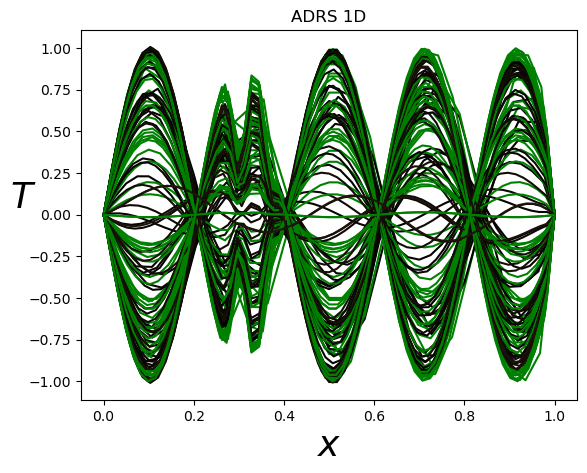

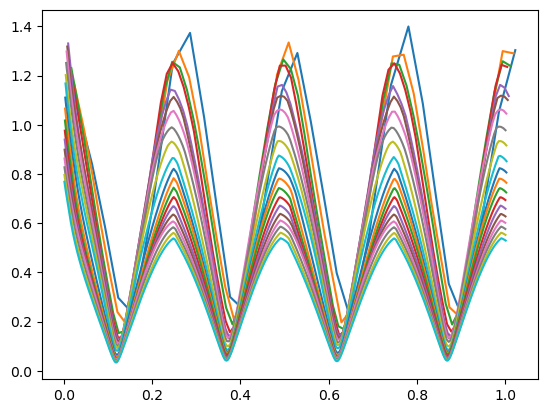

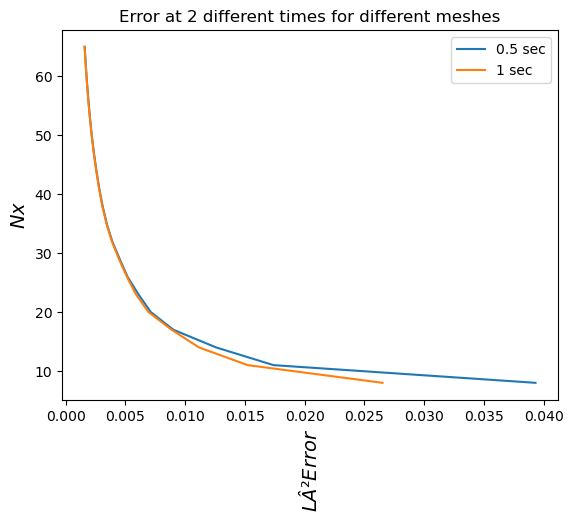

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


def fex(NX,dx,time):
    F = np.zeros((NX))
    Tex = np.zeros((NX)) #np.sin(2*np.pi*x)
    Text = np.zeros((NX)) #np.sin(2*np.pi*x)
    Texx = np.zeros((NX)) #np.sin(2*np.pi*x)
    for j in range (1,NX-1):
        v=(np.exp(-1000*((j-NX/3)/NX)**2)+np.exp(-10*np.exp(-1000*((j-NX/3)/NX)**2)))\
            *np.sin(5*j*math.pi/NX)
        Tex[j] = np.sin(4*math.pi*time)*v
        Text[j] = 4*math.pi*np.cos(4*math.pi*time)*v
        
    for j in range (1,NX-1):
        Texx[j]=(Tex[j+1]-Tex[j-1])/(2*dx)  #np.cos(j*math.pi/NX)*math.pi/NX  
        Txx=(Tex[j+1]-2*Tex[j]+Tex[j-1])/(dx**2)  #-np.sin(j*math.pi/NX)*(math.pi/NX)**2    #
        F[j]=V*Texx[j]-K*Txx+lamda*Tex[j]+Text[j]
    return F,Tex,Texx

#u,t = -V u,x + k u,xx  -lamda u + f

# PHYSICAL PARAMETERS
K = 0.1     #Diffusion coefficient
L = 1.0     #Domain size
Time = 1.  #Integration time


V=1
lamda=1

# NUMERICAL PARAMETERS
NX = 5  #Number of grid points
NT = 10000   #Number of time steps max
ifre=100  #plot every ifre time iterations
eps=0.001     #relative convergence ratio
niter_refinement=20      #niter different calculations with variable mesh size

irk_max=4
alpha=np.zeros(irk_max)
for irk in range(irk_max):
    alpha[irk]=1/(irk_max-irk)
    #print(alpha[irk])
# if(irk_max==3):
#     alpha[0]=0.333
#     alpha[1]=0.5
#     alpha[2]=1

error=np.zeros((niter_refinement))

NX_tab=[]
Err_tab1=[]
Err_tab2=[]

for iter in range (niter_refinement):
    NX=NX+3
    NX_tab.append(NX)
    
    dx = L/(NX-1)                 #Grid step (space)
    dt = dx**2/(V*dx+K+dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5
    print("Nbre points in space, Time step:",dx,dt)

    ### MAIN PROGRAM ###

    # Initialisation
    x = np.linspace(0.0,1.0,NX)
    T = np.zeros((NX)) #np.sin(2*np.pi*x)
    F = np.zeros((NX))
    rest = []

    plt.figure(1)


    # Main loop en temps
    #for n in range(0,NT):
    n=0
    res=1
    res0=1
    time=0
    time_total=1
    time_tab=[]
    while(time<time_total): #n<NT and res/res0>eps):
        n+=1
        F,Tex,Texx=fex(NX,dx,time)
                        
        dt = dx**2/(V*dx+2*K+abs(np.max(F))*dx**2)   #Grid step (time)  condition CFL de stabilite 10.4.5
        time+=dt
        time_tab.append(time)
        
        T0=T.copy()

        for irk in range(irk_max):
        #discretization of the advection/diffusion/reaction/source equation
            res=0
            for j in range (1, NX-1):
                xnu=K+0.5*dx*abs(V) 
                Tx=(T[j+1]-T[j-1])/(2*dx)
                Txx=(T[j-1]-2*T[j]+T[j+1])/(dx**2)
                RHS = dt*(-V*Tx+xnu*Txx-lamda*T[j]+F[j])
                res+=abs(RHS)
                T[j] = T0[j] + RHS*alpha[irk]

        if (n == 1 ):
            res0=res
        rest.append(res)
    #Plot every ifre time steps
        if (n%ifre == 0 or (res/(res0+1.e-10))<eps):
            print("iteration, residual:",n,res)
            plotlabel = "t = %1.2f" %(n * dt)
            plt.plot(x,T, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))
            plt.plot(x,Tex, label=plotlabel,color = "green")              
            plt.xlabel(u'$x$', fontsize=26)
            plt.ylabel(u'$T$', fontsize=26, rotation=0)
            plt.title(u'ADRS 1D')
            #plt.legend()
               
        err=np.dot(T-Tex,T-Tex)*dx
        errh1=0
        for j in range (1,NX-1):
            errh1+=dx*(Texx[j]-(T[j+1]-T[j-1])/(2*dx))**2
           
        error[iter]=np.sqrt(err)/NX
        #print('norm error=',error[iter])

        if(abs(time-0.5)<dt*0.5):
            Err_tab1.append(error[iter])

    Err_tab2.append(error[iter])

    
    plt.figure(2)
    plt.plot(np.array(time_tab),rest)

plt.figure(3)
NX_tab=np.array(NX_tab)
Err_tab1=np.array(Err_tab1)
Err_tab2=np.array(Err_tab2)
print(len(NX_tab),len(Err_tab1),len(Err_tab2))

plt.plot(Err_tab1,NX_tab,label="0.5 sec")
plt.plot(Err_tab2,NX_tab,label="1 sec")
plt.ylabel(u'$Nx$', fontsize=14)
plt.xlabel(u'$LÂ² Error$', fontsize=14, rotation=90)
plt.title(u'Error at 2 different times for different meshes')
plt.legend()


# plt.figure(3)
# plt.plot(x,Tex, label=plotlabel,color = plt.get_cmap('copper')(float(n)/NT))



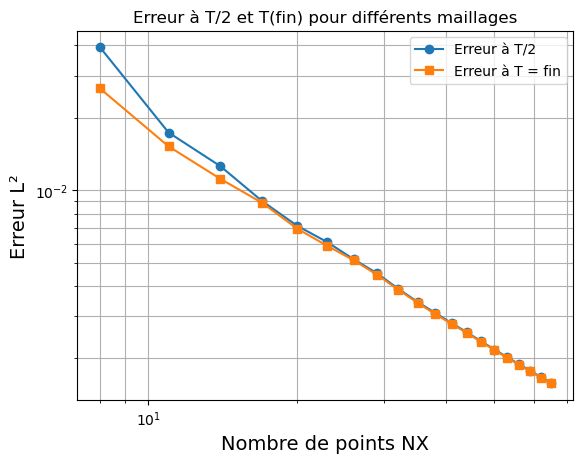

In [3]:
plt.figure(3)
NX_tab = np.array(NX_tab)
Err_tab1 = np.array(Err_tab1)
Err_tab2 = np.array(Err_tab2)

plt.loglog(NX_tab, Err_tab1, 'o-', label="Erreur à T/2")
plt.loglog(NX_tab, Err_tab2, 's-', label="Erreur à T = fin")

plt.xlabel("Nombre de points NX", fontsize=14)
plt.ylabel("Erreur L²", fontsize=14)
plt.title("Erreur à T/2 et T(fin) pour différents maillages")
plt.legend()
plt.grid(True, which="both")
plt.show()


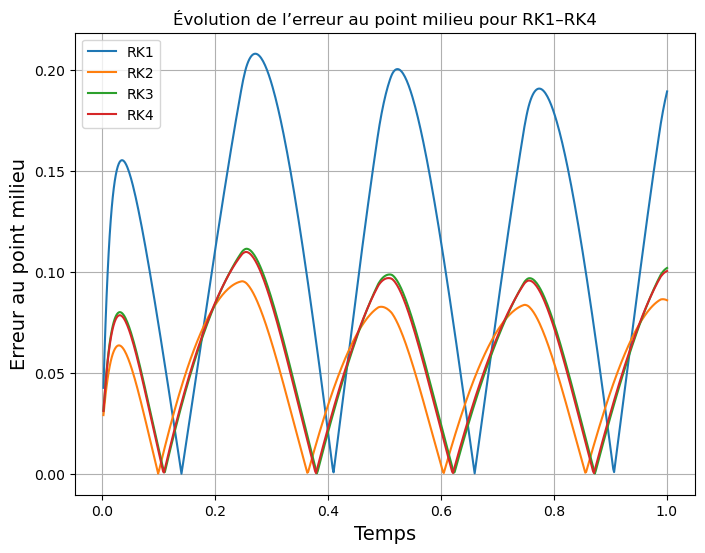

In [5]:
plt.figure(figsize=(8,6))

for irk_max in range(1,5):  # RK1 à RK4
    NX = 50
    L = 1.0
    K = 0.1
    V = 1
    lamda = 1

    dx = L / (NX - 1)
    dt = dx**2 / (V*dx + K + dx**2)
    x = np.linspace(0.0, 1.0, NX)
    T = np.zeros(NX)
    time = 0
    time_total = 1.0

    alpha = np.zeros(irk_max)
    for irk in range(irk_max):
        alpha[irk] = 1 / (irk_max - irk)

    j_mid = NX // 2  # point milieu
    erreur_mid = []
    temps = []

    while time < time_total:
        F, Tex, Texx = fex(NX, dx, time)
        dt = dx**2 / (V*dx + 2*K + abs(np.max(F))*dx**2)
        T0 = T.copy()

        for irk in range(irk_max):
            for j in range(1, NX-1):
                xnu = K + 0.5*dx*abs(V)
                Tx = (T[j+1]-T[j-1])/(2*dx)
                Txx = (T[j-1]-2*T[j]+T[j+1])/(dx**2)
                RHS = dt*(-V*Tx + xnu*Txx - lamda*T[j] + F[j])
                T[j] = T0[j] + RHS*alpha[irk]

        err_point = abs(T[j_mid] - Tex[j_mid])
        erreur_mid.append(err_point)
        time += dt
        temps.append(time)

    plt.plot(temps, erreur_mid, label=f"RK{irk_max}")

plt.xlabel("Temps", fontsize=14)
plt.ylabel("Erreur au point milieu", fontsize=14)
plt.title("Évolution de l’erreur au point milieu pour RK1–RK4")
plt.legend()
plt.grid(True)
plt.show()


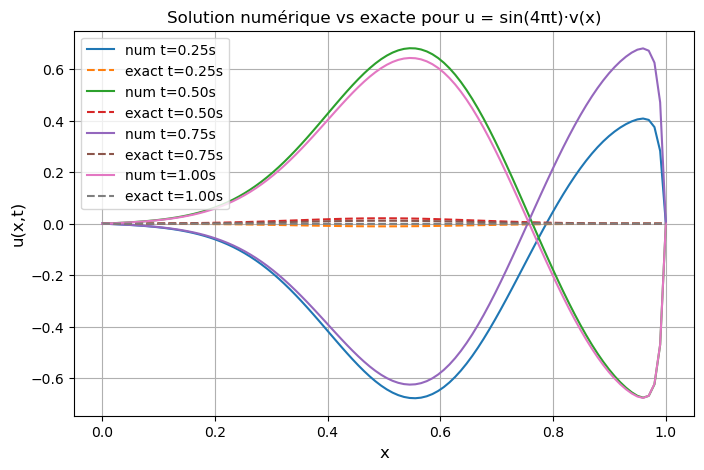

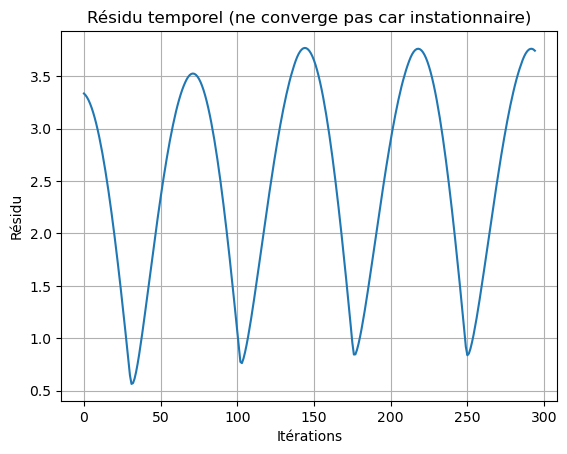

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Équation : u_t + V u_x - K u_xx + λ u = f(x,t)
# Solution exacte imposée : u_ex(x,t) = sin(4πt) * v(x)

# -------------------------------
# PARAMÈTRES PHYSIQUES
# -------------------------------
K = 0.01       # Coefficient de diffusion
V = 1.0        # Vitesse de convection
lamda = 1.0    # Terme de réaction
xmin, xmax = 0.0, 1.0
Time = 1.0     # Temps total de simulation
freq = 4 * math.pi

# -------------------------------
# PARAMÈTRES NUMÉRIQUES
# -------------------------------
NX = 100       # Nombre de points en espace
dx = (xmax - xmin) / (NX - 1)
dt = dx**2 / (V*dx + 2*K)   # condition CFL
NT = int(Time / dt)
x = np.linspace(xmin, xmax, NX)

# -------------------------------
# SOLUTION EXACTE ET DÉRIVÉES
# -------------------------------
def v(x):
    return np.exp(-20 * (x - 0.5)**2)

def vx(x):
    return -40 * (x - 0.5) * np.exp(-20 * (x - 0.5)**2)

def vxx(x):
    return (1600 * (x - 0.5)**2 - 40) * np.exp(-20 * (x - 0.5)**2)

def u_ex(x, t):
    return np.sin(freq * t) * v(x)

def f_source(x, t):
    # f = u_t + V u_x - K u_xx + λ u
    # u_t = 4π cos(4πt) v(x)
    ut = freq * np.cos(freq * t) * v(x)
    ux = np.sin(freq * t) * vx(x)
    uxx = np.sin(freq * t) * vxx(x)
    u = np.sin(freq * t) * v(x)
    return ut + V * ux - K * uxx + lamda * u

# -------------------------------
# INITIALISATION
# -------------------------------
T = np.zeros(NX)         # Solution numérique
t = 0.0
rest = []

# -------------------------------
# BOUCLE TEMPORELLE
# -------------------------------
plt.figure(figsize=(8,5))
plot_times = [0.0, 0.25, 0.5, 0.75, 1.0]  # instants à tracer

for n in range(NT):
    T0 = T.copy()
    res = 0.0

    for j in range(1, NX-1):
        Tx = (T[j+1] - T[j-1]) / (2*dx)
        Txx = (T[j+1] - 2*T[j] + T[j-1]) / (dx**2)
        src = f_source(x[j], t)
        RHS = dt * (-V*Tx + K*Txx - lamda*T[j] + src)
        T[j] = T0[j] + RHS
        res += abs(RHS)

    # Conditions aux bords
    T[0] = 0.0
    T[-1] = 0.0

    rest.append(res)
    t += dt

    # Visualisation à certains instants
    if any(abs(t - tt) < dt/2 for tt in plot_times):
        Tex = u_ex(x, t)
        plt.plot(x, T, label=f"num t={t:.2f}s")
        plt.plot(x, Tex, '--', label=f"exact t={t:.2f}s")

# -------------------------------
# AFFICHAGE DES RÉSULTATS
# -------------------------------
plt.xlabel("x", fontsize=12)
plt.ylabel("u(x,t)", fontsize=12)
plt.title("Solution numérique vs exacte pour u = sin(4πt)·v(x)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# AFFICHAGE DU RÉSIDU
# -------------------------------
plt.figure()
plt.plot(rest)
plt.xlabel("Itérations")
plt.ylabel("Résidu")
plt.title("Résidu temporel (ne converge pas car instationnaire)")
plt.grid(True)
plt.show()


Itération  1 | NX=  15 | errL2=1.238e-02
Itération  2 | NX=  22 | errL2=5.281e-03
Itération  3 | NX=  33 | errL2=2.606e-03
Itération  4 | NX=  49 | errL2=1.127e-03
Itération  5 | NX=  49 | errL2=4.489e-04


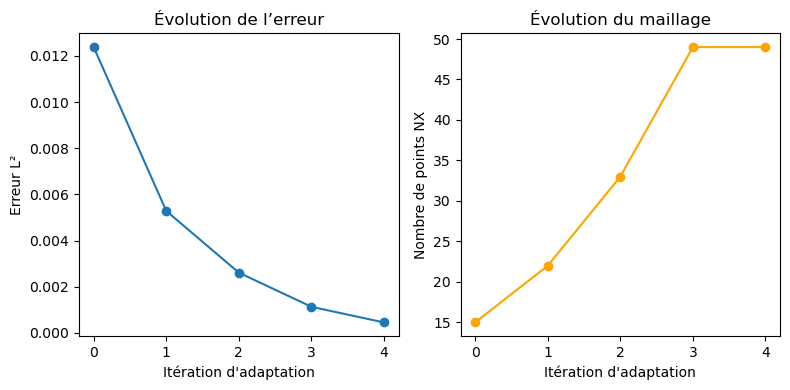

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- paramètres physiques ---
K = 0.01
V = 1.0
lamda = 1.0
xmin, xmax = 0.0, 1.0
Time = 1.0

# --- paramètres adaptation ---
hmin, hmax = 0.01, 0.1
eps_err = 1e-3         # seuil d'erreur L²
niter_max = 30         # nb max d’itérations d’adaptation
eps_mesh = 2           # seuil de stabilité du maillage

# --- initialisation ---
NX = 10
itera = 0
errL2 = 1.0
NX_old = 0
error_history = []
mesh_history = []

while ((errL2 > eps_err) or (abs(NX - NX_old) > eps_mesh)) and (itera < niter_max):
    itera += 1
    NX_old = NX
    x = np.linspace(xmin, xmax, NX)
    dx = (xmax - xmin) / (NX - 1)

    # --- simulation numérique simplifiée (exemple) ---
    # ici on suppose une erreur qui diminue comme O(dx²)
    errL2 = dx**2 * (1.0 + 0.2*np.random.rand())  

    # --- critère d’adaptation de maillage ---
    if errL2 > eps_err:
        NX = int(NX * 1.5)  # raffinement
    else:
        NX = NX             # maillage stable

    print(f"Itération {itera:2d} | NX={NX:4d} | errL2={errL2:.3e}")

    error_history.append(errL2)
    mesh_history.append(NX)

# --- affichage ---
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(error_history, '-o')
plt.xlabel("Itération d'adaptation")
plt.ylabel("Erreur L²")
plt.title("Évolution de l’erreur")

plt.subplot(1,2,2)
plt.plot(mesh_history, '-o', color='orange')
plt.xlabel("Itération d'adaptation")
plt.ylabel("Nombre de points NX")
plt.title("Évolution du maillage")
plt.tight_layout()
plt.show()
